## Prerequisites (⚠️ IMPORTANT!)
- ตรวจสอบให้แน่ใจว่าคุณได้ติดตั้ง semantic link ไว้ใน Workspace ของคุณ หากคุณเป็นผู้ดูแล Workspace ให้ไปที่ Workspace Settings -> Library Management แล้วเพิ่ม 'semantic-link' หรือคุณสามารถติดตั้ง semantic-link ภายใน Notebook โดยคำสั่ง pip install ข้างใต้นี้: 

In [1]:
# install semantic-link inline 
%pip install semantic-link

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 8, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 156.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 126.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 142.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 185.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Sempy 
Sempy (อ่าน [ฉบับเต็ม](https://learn.microsoft.com/en-us/python/api/semantic-link-sempy/sempy?view=semantic-link-python)) เป็นแพ็กเกจของ Python ที่มาพร้อมกับ 'semantic-link'

## นำเข้า Sempy
เริ่มต้นด้วยการนำเข้า sempy.fabric และตั้งชื่อย่อว่า `fabric` เพื่อให้เราสามารถอ้างอิงถึงมันเมื่อเรียกใช้ในโค้ดภายหลังได้


In [2]:
import sempy.fabric as fabric

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 10, Finished, Available)

#### กรณีศึกษา 1: การรับข้อมูลจากชุดข้อมูล Power BI เข้าสู่ Fabric DataFrame (คล้ายกับ pandas)
พื้นฐานการใช้งานแรกสุดสำหรับ semantic link คือการอ่านข้อมูลจากตารางใน semantic แล้วโหลดเข้าสู่ออบเจ็กต์ของ Python ที่เรียกว่า Fabric DataFrame

In [4]:
# กำหนดตัวแปร semantic_model_name เก็บชื่อของ Semantic Model
semantic_model_name = "Customer Profitability Sample"

# อ่านตาราง Customer กำหนดใส่ลงในตัวแปร customer_df ชนิด dataframe
customer_df = fabric.read_table(semantic_model_name, 'Customer')

# แสดงผล
display(customer_df)

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 12, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:428: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Expected a string or bytes dtype, got float64
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.


SynapseWidget(Synapse.DataFrame, a22ca555-469f-40f4-a562-a4fdf222b0d0)

ลองสำรวจผ่านฟังก์ชัน `type()`

In [5]:
type(customer_df)

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 13, Finished, Available)

sempy.fabric._dataframe._fabric_dataframe.FabricDataFrame

### อะไรคือ Fabric DataFrame? 
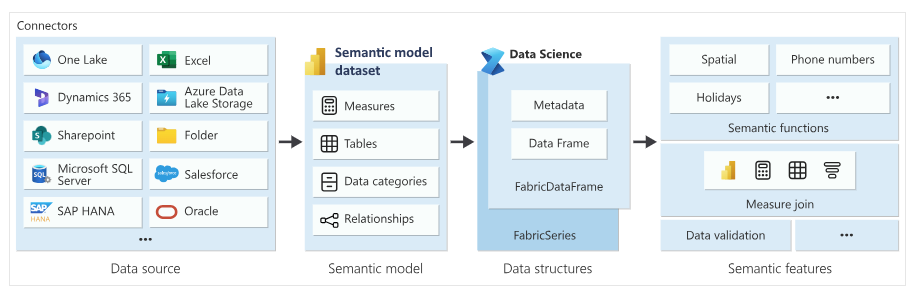
[Source](https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-overview#fabricdataframe-data-structure)

Fabric DataFrame เป็นโครงสร้างข้อมูลหลัก เป็นคลาสย่อยของ pandas DataFrame โดยเพิ่ม metadata เช่น semantic information และ lineage เข้าไป 

Fabric DataFrame จะช่วยเผยแพร่ semantic information จาก semantic models ไปสู่สภาพแวดล้อมของ Data Science



ตัวอย่าง, เราสามารถเรียก pandas property `df.shape` จาก Fabric DataFrame ดังแสดง:  



In [6]:
customer_df.shape

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 14, Finished, Available)

(327, 7)

## การเข้าถึง (และแสดงผล) ความสัมพันธ์ระหว่างตารางใน semantic Model
Semantic Link เปิดโอกาสให้เราสามารถเข้าถึงความสัมพันธ์ระหว่างตารางภายใน Semantic Model นอกเหนือจากการเข้าถึงข้อมูลในตาราง

In [7]:
semantic_model_name = "Customer Profitability Sample"
relationships = fabric.list_relationships(semantic_model_name)
relationships

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 15, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time
0,m:1,Fact,BU Key,BU,BU Key,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-04-14 19:01:12
1,m:1,Fact,YearPeriod,Calendar,YearPeriod,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-04-14 19:01:12
2,m:1,Fact,Customer Key,Customer,Customer,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-04-14 19:01:12
3,m:1,BU,Executive_id,Executive,ID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-04-14 19:01:12
4,m:1,Customer,Industry ID,Industry,ID,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-04-14 19:01:12
5,m:1,Customer,State,State,StateCode,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-04-14 19:01:12
6,m:1,Fact,Scenario Key,Scenario,Scenario Key,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-04-14 19:01:12
7,m:1,Fact,Product Key,Product,Product Key,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-04-14 19:05:24


### พล็อตกราฟความสัมพันธ์
หากคุณชอบดูภาพมากกว่า คุณสามารถพล็อตความสัมพันธ์ที่ได้จาก `fabric.list_relationships()` โดยใช้ subpackage อื่นของ sempy ที่ชื่อว่า `sempy.relationships` ดังนี้ 

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 16, Finished, Available)

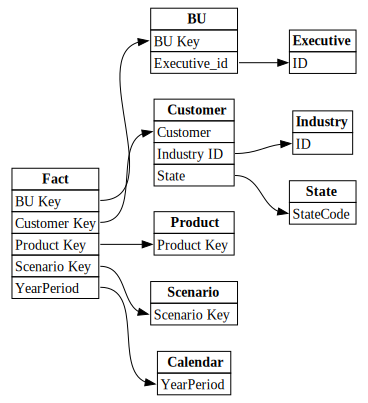

In [8]:
from sempy.relationships import plot_relationship_metadata

plot_relationship_metadata(relationships)

## การเข้าถึง measures ใน semantic model
สามารถทำได้โดยใช้ `fabric.list_measures()` 

In [9]:
measures = fabric.list_measures(semantic_model_name)
measures.head(5)

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 17, Finished, Available)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description
0,Fact,Total Revenue,SUM([Revenue]),Double,False,,
1,Fact,Sum of Material Costs,SUM([Material Costs]),Double,False,,
2,Fact,Sum of Labor Costs Variable,SUM([Labor Costs Variable]),Double,False,,
3,Fact,Sum of Taxes,SUM([Taxes]),Double,False,,
4,Fact,Sum of Rev for Exp Travel,SUM([Rev for Exp Travel]),Double,False,,


### การประมวลผล DAX measures
เราสามารถทำได้เพิ่ม มากกว่าแค่แสดง measures โดยเรียกใช้ `fabric.evaluate_measure()` เพื่อประมวลผล measure

In [10]:
fabric.evaluate_measure(semantic_model_name, measure='Total Revenue')

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 18, Finished, Available)

,Total Revenue
0,235208998.946


#### ประมวลผล Measure ผ่าน Group By
เพราะ semantic link ส่งคืน 'semantically-aware' ทำให้เข้าใจความสัมพันธ์ เรามาลองประมวลผลที่ซับซ้อนขึ้นด้วย `groupby_columns`. 

ผลที่ได้คือ Total Revenue ของแต่ละ Product

In [11]:
fabric.evaluate_measure(semantic_model_name, measure="Total Revenue", groupby_columns=["Product[Product]"])

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 19, Finished, Available)

,Product,Total Revenue
0,<NA>,38615613.54
1,Doroga,7362615.92
2,Gladius,59096435.924
3,Gunner,78300.0
4,MI-72,690550.236
5,Primus,120854181.526
6,Sova,8511301.8


### วิเคราะห์ความสัมพันธ์ภายใน semantic models 
Semantic Link ยังมีฟังก์ชันที่ช่วยให้เราสามารถตรวจสอบความสัมพันธ์ใน semantic model ได้ด้วย

In [16]:
semantic_model_name = "Customer Profitability Sample"

# สร้าง dictionary ของตาราง โดยชื่อของแต่ละตารางคือ key 
tables = {table: fabric.read_table(semantic_model_name, table) for table in fabric.list_tables(semantic_model_name)['Name']}

# แสดง key เพื่อให้แน่ใจว่าทำงานแล้ว
tables.keys()

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 24, Finished, Available)

dict_keys(['Fact', 'BU', 'Calendar', 'Scenario', 'Product', 'Customer', 'Industry', 'Executive', 'State'])

In [17]:
# เริ่มต้นด้วยการหาความสัมพันธ์ใน semantic model
relationships = fabric.list_relationships(semantic_model_name)

# เรียก fabric.list_relationship_violations เพื่อส่ง dictionary ของตาราง พร้อมความสัมพันธ์ 
violations = fabric.list_relationship_violations(tables, relationships)

#แสดงผล
display(violations)

StatementMeta(, 6a147fbc-7757-4544-84b4-565f16498544, 25, Finished, Available)

SynapseWidget(Synapse.DataFrame, 28c369bb-5826-4935-a68c-727e93fcf0b3)